<a href="https://colab.research.google.com/github/Raquel223/Ciclo-Diurno-Relampagos/blob/main/pico_corrente_BrasilDAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciclo diurno do pico de corrente dos relâmpagos**
---
- **OBJETIVO:** Observar qual a variação temporal do pico de corrente dos relâmpagos ao longo do dia. 

---

**Dados utilizados**: Os dados de relâmpagos foram obtidos da rede BrasilDAT, através da campanha CHUVA-Vale do Paraíba. Neste exemplo foram utilizados dados do mês de dezembro.

---

- **METODOLOGIA:** Nessa aula realizaremos os seguintes procedimentos:

    1.   **Importação** das biblotecas
    2.   Montagem do **drive online**
    3.   **Abrir** o arquivo 
    4.   **Agrupando** os relâmpagos CG
    5.   **Transformar** UTC para hora local
    6.   **Plotar** a figura
    
---

**OBSERVAÇÕES IMPORTANTES**: 
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive 

---
- **Realizado por:** Raquel Gonçalves Pereira e Enrique V. Mattos - 25/08/2021

# **Exemplo da figura que será gerada**

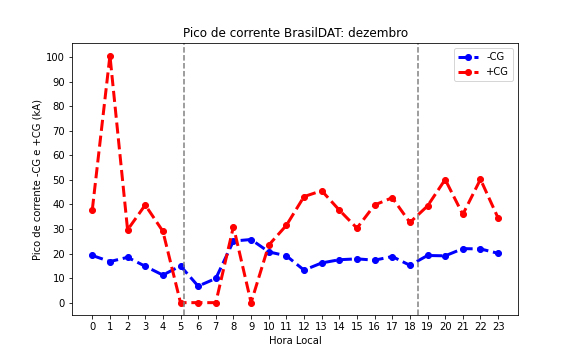

# **Importação das bibliotecas**

In [ ]:
import pandas as pd
import glob
import os
from matplotlib import pyplot as plt
import numpy as np
import  tarfile

# **Montagem do drive online**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **### >>> MUDANÇAS AQUI <<< ###**:
- Insira o **caminho + nome** do arquivo

In [ ]:
filename = '/content/drive/MyDrive/GitHub/BrasilDAT/Novo_Dezembro.csv'

dir = os.path.dirname(filename)

# **Abrindo o arquivo csv (filtro de 100 km)**

In [ ]:
df = pd.read_csv(filename)
df
#index_col=0 para tirar o unnamed 

,Unnamed: 0,tipo,ano,mes,dia,hor,pc(A),lat,lon,distancia
0,291,IC,2011,12,1,0,2.0,-23.831063,-47.362767,80.176647
1,393,IC,2011,12,1,0,-3.6,-23.747681,-47.299678,70.926538
2,427,IC,2011,12,1,0,-3.0,-23.680954,-47.207217,59.820518
3,464,IC,2011,12,1,0,2.2,-23.660856,-47.214331,60.030432
4,730,IC,2011,12,1,0,-2.0,-23.883682,-47.379116,84.102026
...,...,...,...,...,...,...,...,...,...,...
241258,3565780,IC,2011,12,31,23,11.4,-23.180063,-47.192800,69.840121
241259,3568857,IC,2011,12,31,23,2.4,-23.360032,-45.774964,90.710722
241260,3568858,IC,2011,12,31,23,1.4,-23.373971,-45.744405,93.414592
241261,3568859,IC,2011,12,31,23,-2.3,-23.365797,-45.753093,92.742952


In [ ]:
#filtrei só as colunas que quero
tipos_hora_pico = df[['tipo','hor','pc(A)']]
display(tipos_hora_pico)
type(tipos_hora_pico)

,tipo,hor,pc(A)
0,IC,0,2.0
1,IC,0,-3.6
2,IC,0,-3.0
3,IC,0,2.2
4,IC,0,-2.0
...,...,...,...
241258,IC,23,11.4
241259,IC,23,2.4
241260,IC,23,1.4
241261,IC,23,-2.3


pandas.core.frame.DataFrame

**Filtrando da coluna 'tipo' somente os CG**

- Somente os relâmpagos CG, que são aqueles que saem da nuvem e vão para o solo, que possuem pico de corrente. Essa corrente pode ser **positiva** ou **negativa**

In [ ]:
CG = tipos_hora_pico[ tipos_hora_pico['tipo'] == 'CG' ]

In [ ]:
#separei os CG em positivo e negativo
CG_pos = CG[CG['pc(A)'] > 0]
CG_neg = CG[CG['pc(A)'] < 0]

# **Agrupando os CG em cada hora do dia**

**+CG**

In [ ]:
CGpos = CG_pos.groupby('hor').mean()
new_index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
CGpos_ = CGpos.reindex(new_index,fill_value=0) 

**-CG**

In [ ]:
quantidade_CG_neg = CG_neg.groupby('hor').mean()
#tirar o negativo dos valores
CGneg = abs(quantidade_CG_neg)
new_index1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
CGneg_ = CGneg.reindex(new_index1,fill_value=0) 

# **Transformar de UTC para hora local**

**+CG**

In [ ]:
Hora_local2 = [21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
CGpos_.insert(loc =1,column ='Hora local', value = Hora_local2)  #adicionei a coluna hora local no final do date frame
CG_pos_final = CGpos_.set_index('Hora local') #transformei o index na hora local 
CG_pos_finalizado = CG_pos_final.sort_index()  #coloquei em ordem crescente

**-CG**

In [ ]:
Hora_local1 = [21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
CGneg_.insert(loc =1,column ='Hora local', value = Hora_local1) #adicionei a coluna hora local no final do date frame
CG_neg_final = CGneg_.set_index('Hora local') #transformei o index na hora local 
CG_neg_finalizado = CG_neg_final.sort_index()  #coloquei em ordem crescente

**Juntando os 2 tipos em uma tabela**

In [ ]:
tabela = pd.concat([CG_pos_finalizado, CG_neg_finalizado],axis =1) 
tabela.columns = ['+CG','-CG']
display(tabela)

,+CG,-CG
Hora local,,
0,37.822222,19.221405
1,100.700000,16.754369
2,29.666667,18.463559
3,39.800000,14.833333
4,29.100000,11.240000
5,0.000000,14.977778
6,0.000000,6.733333
7,0.000000,9.860000
8,31.000000,25.100000


# **Plotagem da figura**

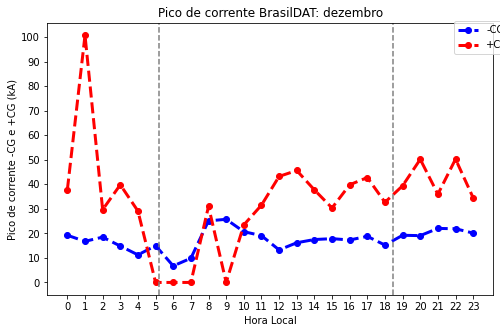

In [ ]:
#Criando a figura
fig,ax  = plt.subplots(figsize=(8,5))

ax.plot(CG_neg_finalizado, color = 'blue', marker = 'o', lw =3, ls = '--', label = '-CG')
ax.plot(CG_pos_finalizado, color = 'red', marker = 'o', lw =3, ls = '--', label = '+CG')

#Nome dos eixos
ax.set_xlabel('Hora Local')
ax.set_ylabel('Pico de corrente -CG e +CG (kA)')

#Plotar linhas verticais, nesse caso são os horários do nascer e por do sol
plt.axvline(x=5.17, color ='gray', ls = '--')
plt.axvline(x=18.46, color='gray', ls = '--')

#Legenda
fig.legend(loc=2, bbox_to_anchor=(.78,.88))

####plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xticks(np.arange(0,24,1))
plt.yticks(np.arange(0,110,10))
plt.title('Pico de corrente BrasilDAT: dezembro')


plt.savefig(f'{dir}/pico_corrente_BrasilDAT.png', format='png')